# Fluxによる自動微分機構の利用例

\begin{align}
	\sin(x) = x - \frac{x^3}{3!} + \frac{x^5}{5!} - \cdots (-1)^i \frac{x^{2i+1}}{(2i+1)!} + \cdots
\end{align}

を打ち切って得られる
\begin{align}
	\mbox{tsin}(x) \equiv x - \frac{x^3}{3!} + \frac{x^5}{5!} - \cdots (-1)^n \frac{x^{2n+1}}{(2n+1)!}
\end{align}
について自動微分を行う。

Copyright (c) 2022 Tadashi Wadayama  
Released under the MIT license  
https://opensource.org/licenses/mit-license.php

In [6]:
using Plots
using Flux
gr()

Plots.GRBackend()

## $\mbox{tsin}(x)$の定義

In [1]:
function tsin(x)
    sum = 0.0
    n = 8
    for i in 0:n
        if i % 2 == 0
            sum += (1.0/factorial(2*i+1))*x^(2*i+1)
        else
            sum += -(1.0/factorial(2*i+1))*x^(2*i+1)
        end
    end
    return sum
end     

tsin (generic function with 1 method)

## $\mbox{tsin}(x)$の導関数

In [8]:
d_tsin(x) = gradient(tsin, x)[1] # derivative of tsin(x)

d_tsin (generic function with 1 method)

## 各関数のプロット

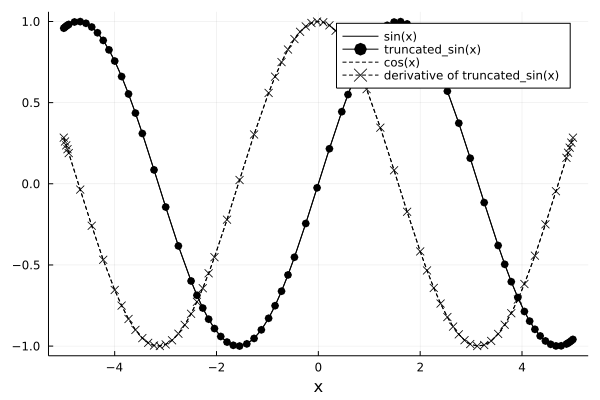

In [9]:
plot(sin, label="sin(x)", lw=1, color=:black, xlabel="x")
plot!(tsin, label="truncated_sin(x)", marker=:o, color=:black)
plot!(cos, label="cos(x)", lw=1, color=:black, ls=:dash)
plot!(d_tsin, label="derivative of truncated_sin(x)", lw=1, marker=:x, color=:black, ls=:dash)

In [10]:
savefig("tsin.pdf")